# Regions investigation and workspace
This notebook allows to both:
- investigate the existing regioner on the given dataste
- develop new regioner and see the results live


In [1]:
import importlib
from utils import *

import skimage.morphology
import sep.inspect.regions as regions_inspect
import sep.assessors.regions as regions
import sep._commons.visuals as visuals

## Prepare dataset

In [2]:
import sep.loaders.images
data_root = pick_path([root_dir / "tests" / "input"])
dataset = data_root / "humans"
data_loader = sep.loaders.images.ImagesLoader(str(dataset))

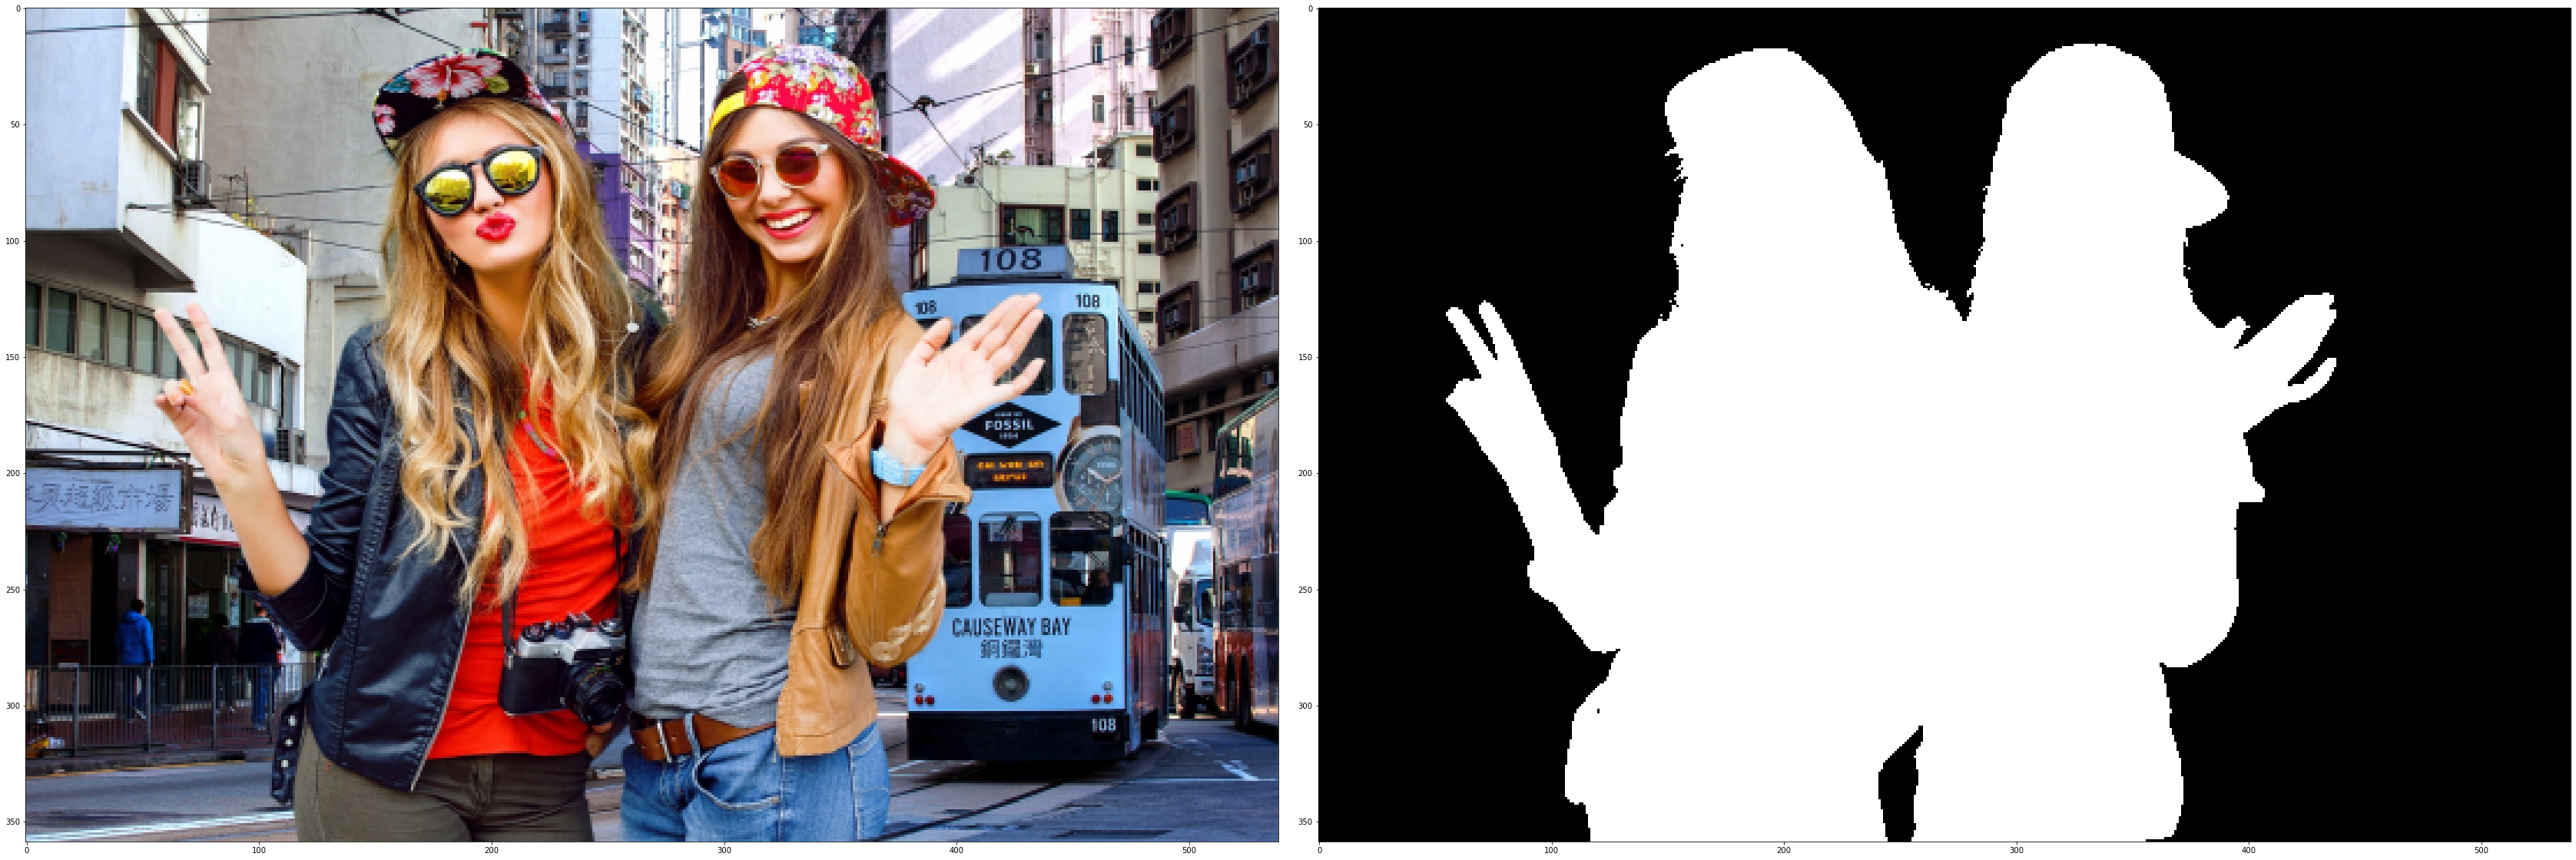

In [3]:
image = data_loader[0]['image']
annotation = data_loader[0]['annotation']
show_all(1, 2, image, annotation)

## Develop new regioner
In this section you can develop a new regionizer which you can later move to the actual Regioner class.

In [4]:
def new_regionize(ground_truth, mask) -> np.ndarray:
    selem = skimage.morphology.disk(6)
    dilated = skimage.morphology.binary_dilation(ground_truth, selem)
    eroded =  skimage.morphology.binary_erosion(ground_truth, selem)
    return dilated > eroded 

def new_regionize2(ground_truth, mask) -> np.ndarray:
    selem = skimage.morphology.disk(31)
    dilated = skimage.morphology.binary_dilation(ground_truth, selem)
    eroded =  skimage.morphology.binary_erosion(ground_truth, selem)
    return ground_truth == (dilated > eroded) 

In [5]:
image_num = 0
image = data_loader[image_num]['image']
annotation = data_loader[image_num]['annotation']

 <class 'numpy.ndarray'>
Shape: (359, 539) Type: bool Min-max: False True


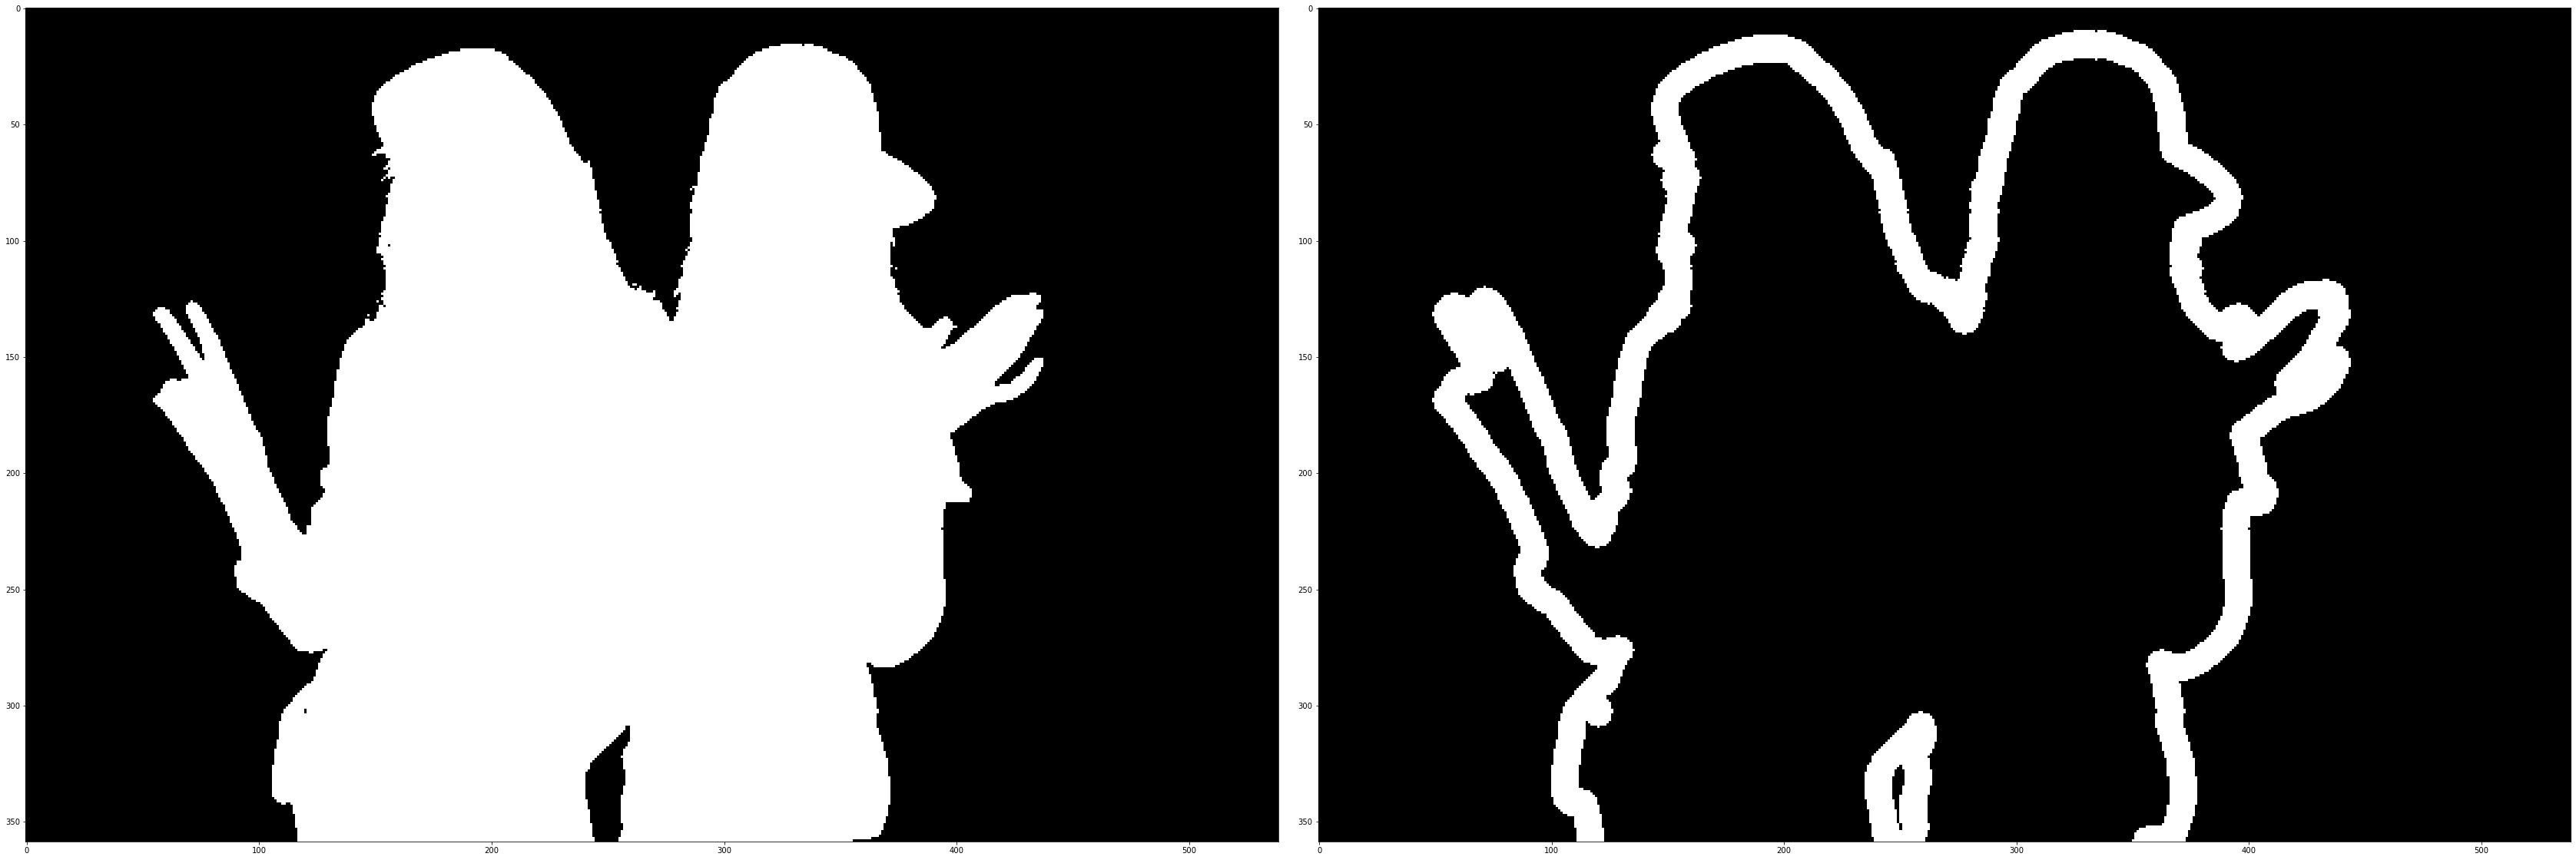

In [7]:
region = new_regionize(annotation, mask=image)
info(region)
show_all(1, 2, annotation, region)

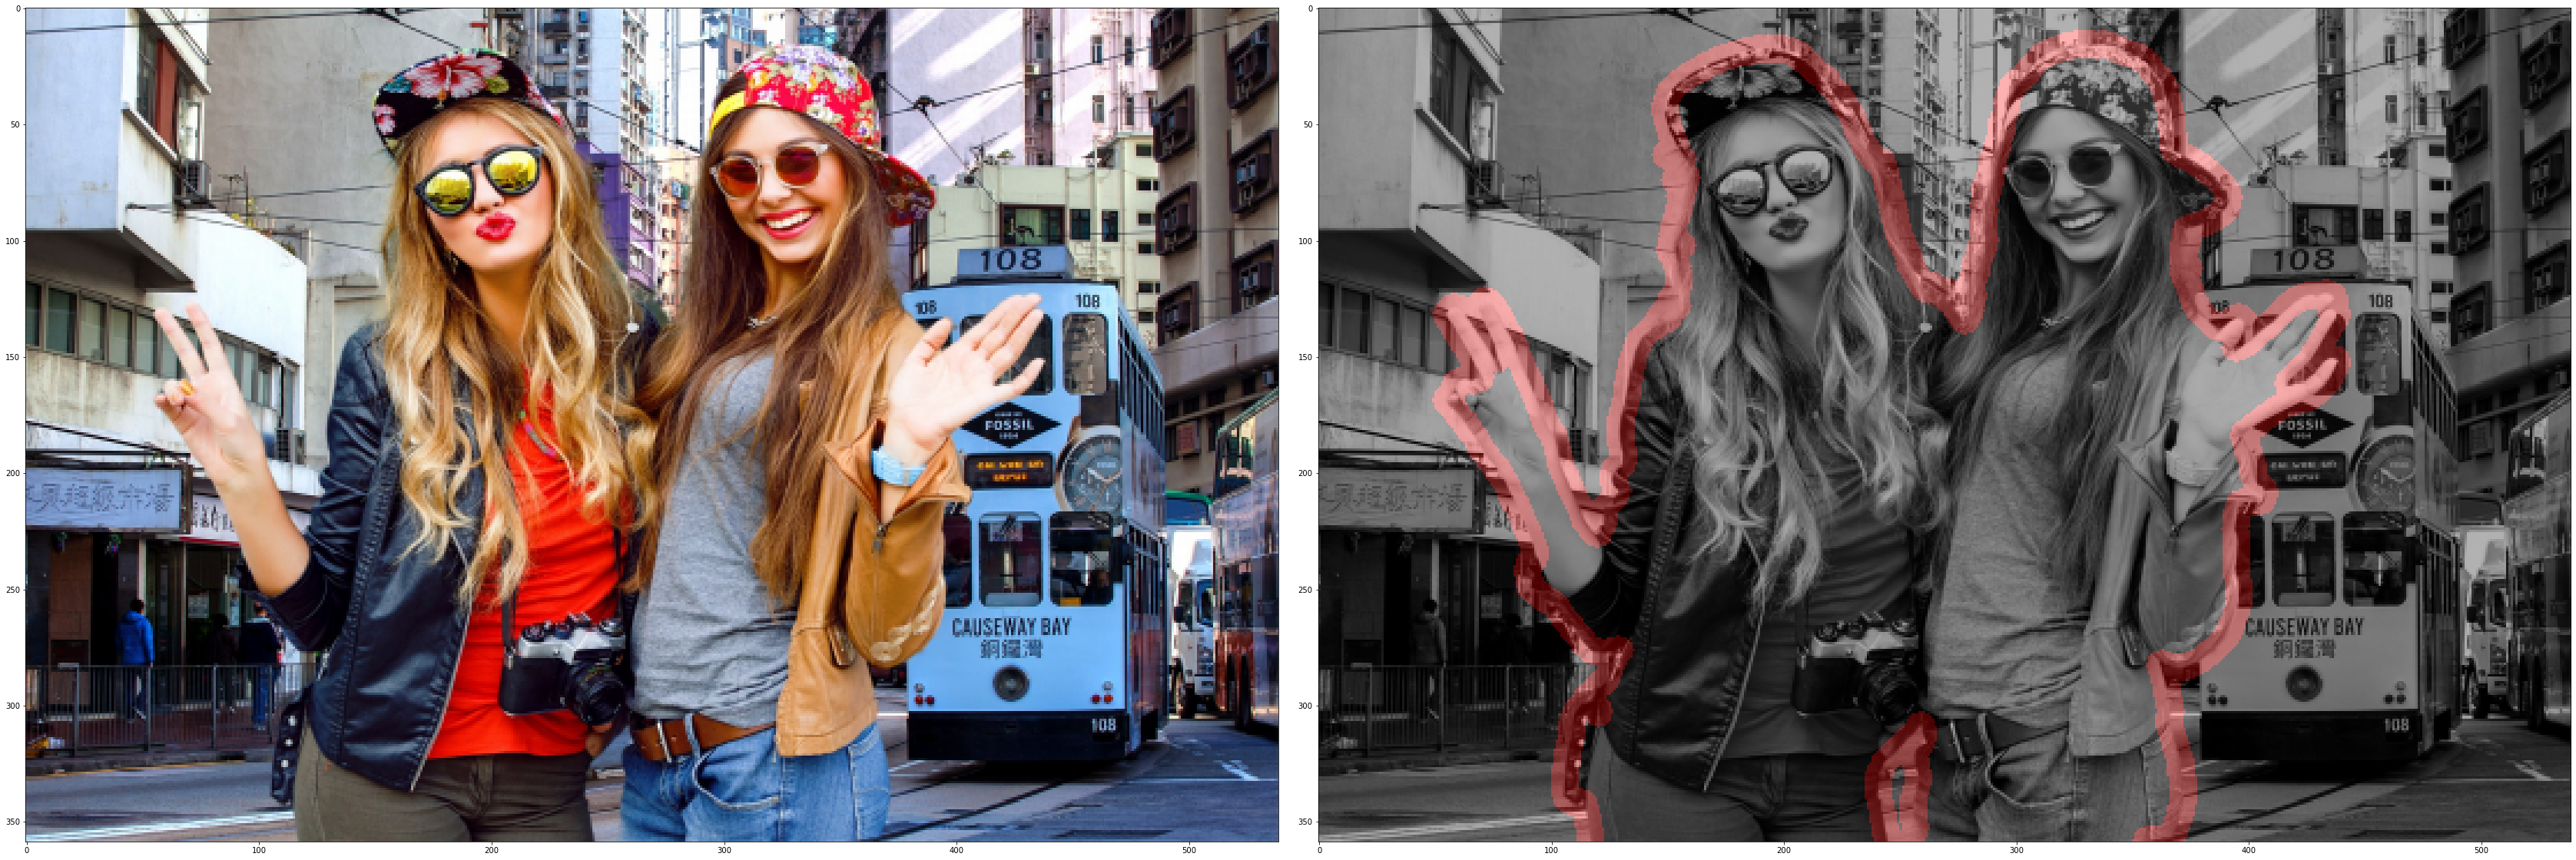

In [8]:
importlib.reload(regions_inspect)
overlay = regions_inspect.overlay_region(image=image, region=region)
show_all(1, 2, image, overlay)

 <class 'imageio.core.util.Array'>
Shape: (359, 539) Type: bool Min-max: False True


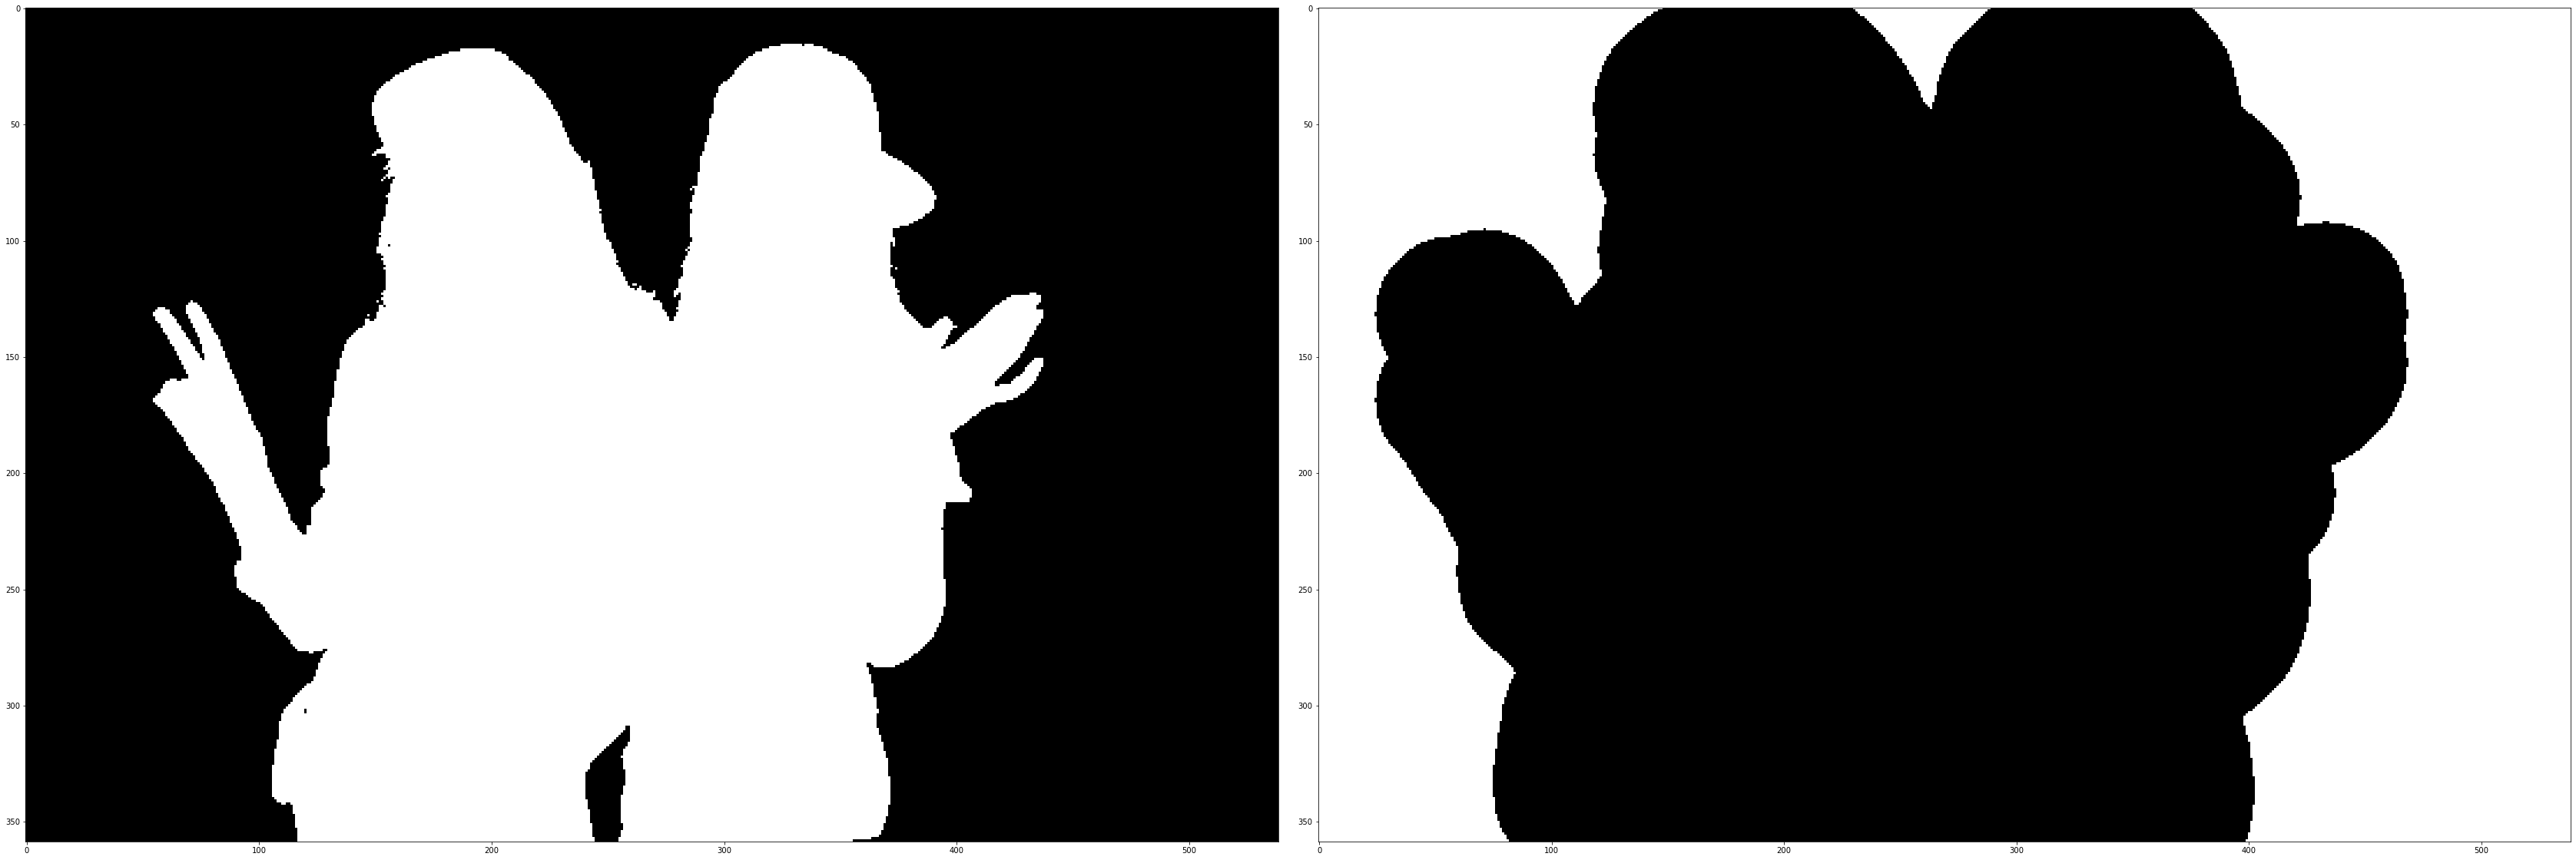

In [10]:
region2 = new_regionize2(annotation, mask=image)
info(region2)
show_all(1, 2, annotation, region2)

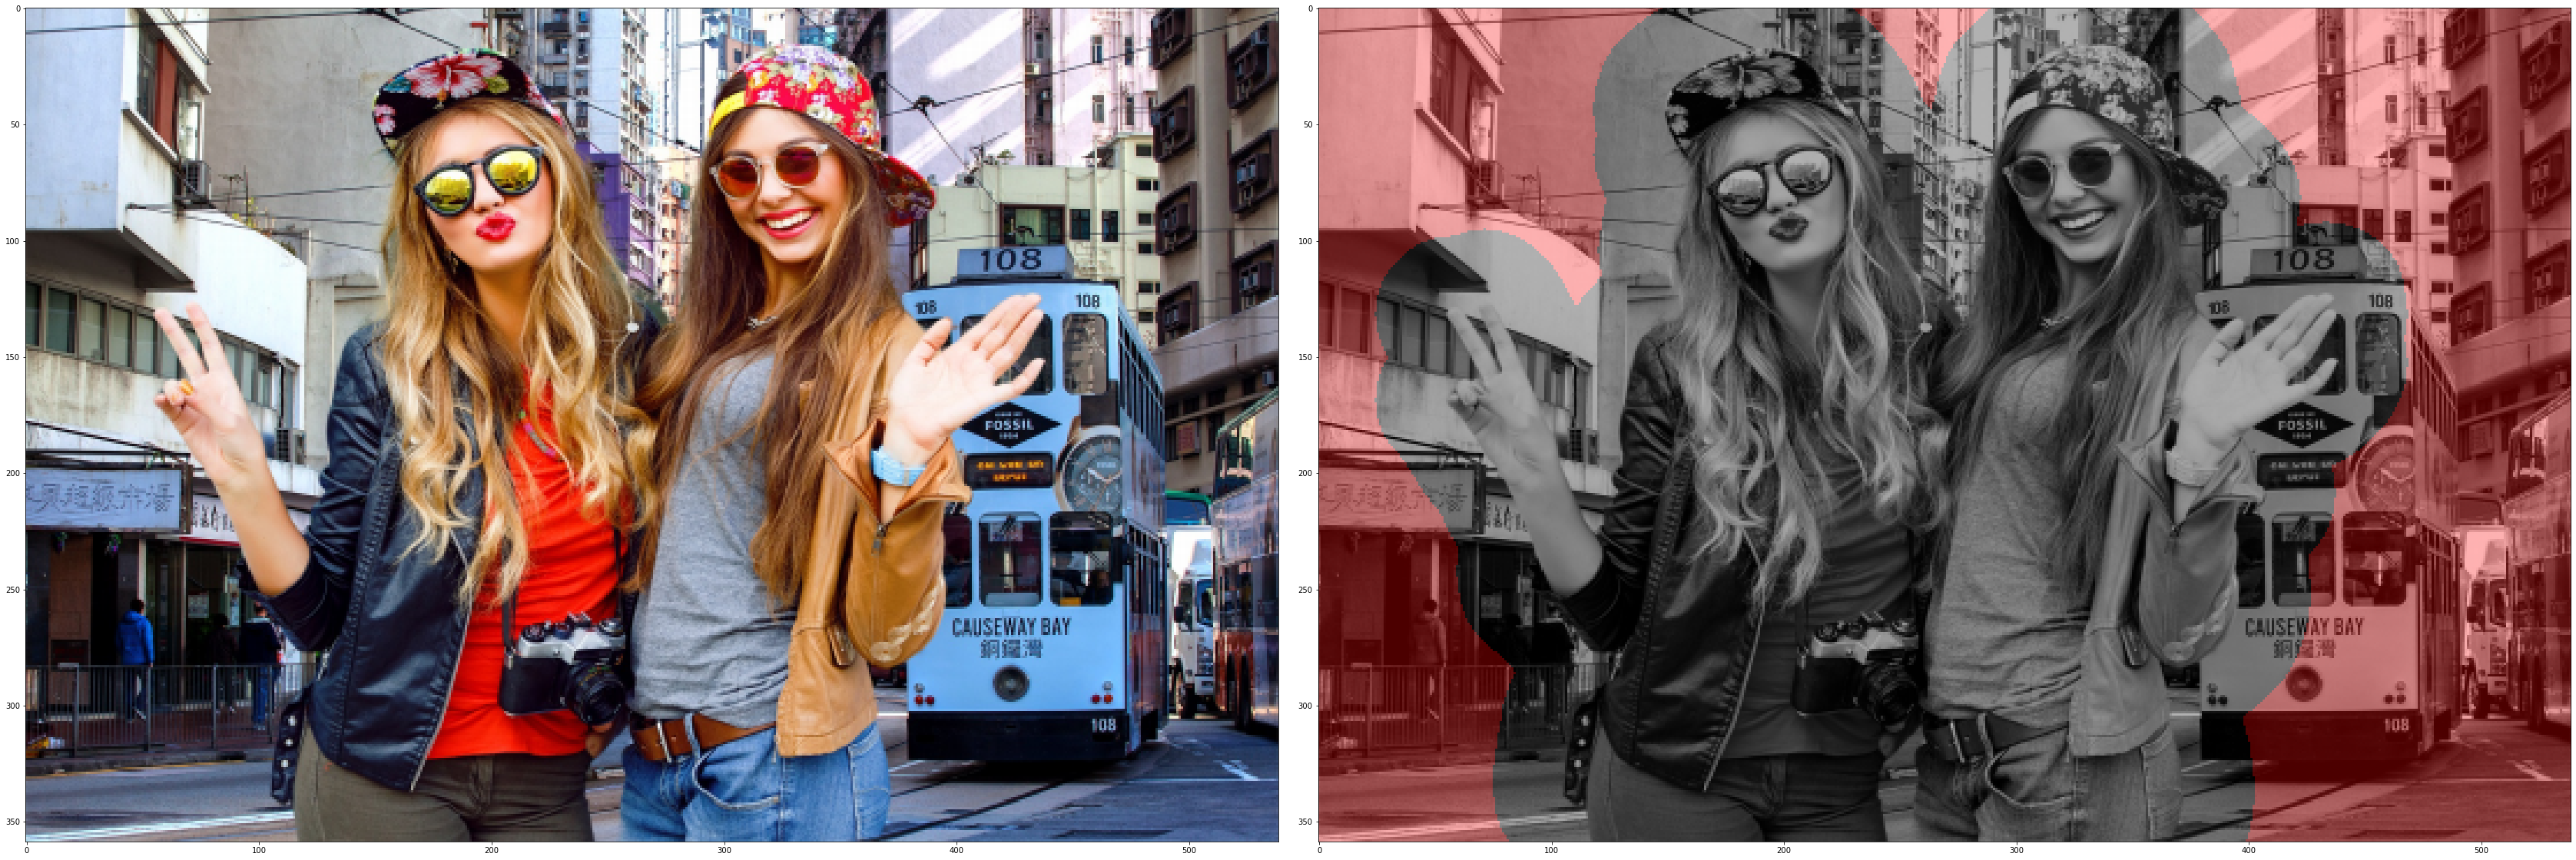

In [18]:
importlib.reload(regions_inspect)
overlay = regions_inspect.overlay_region(image=image, region=region2)
show_all(1, 2, image, overlay)

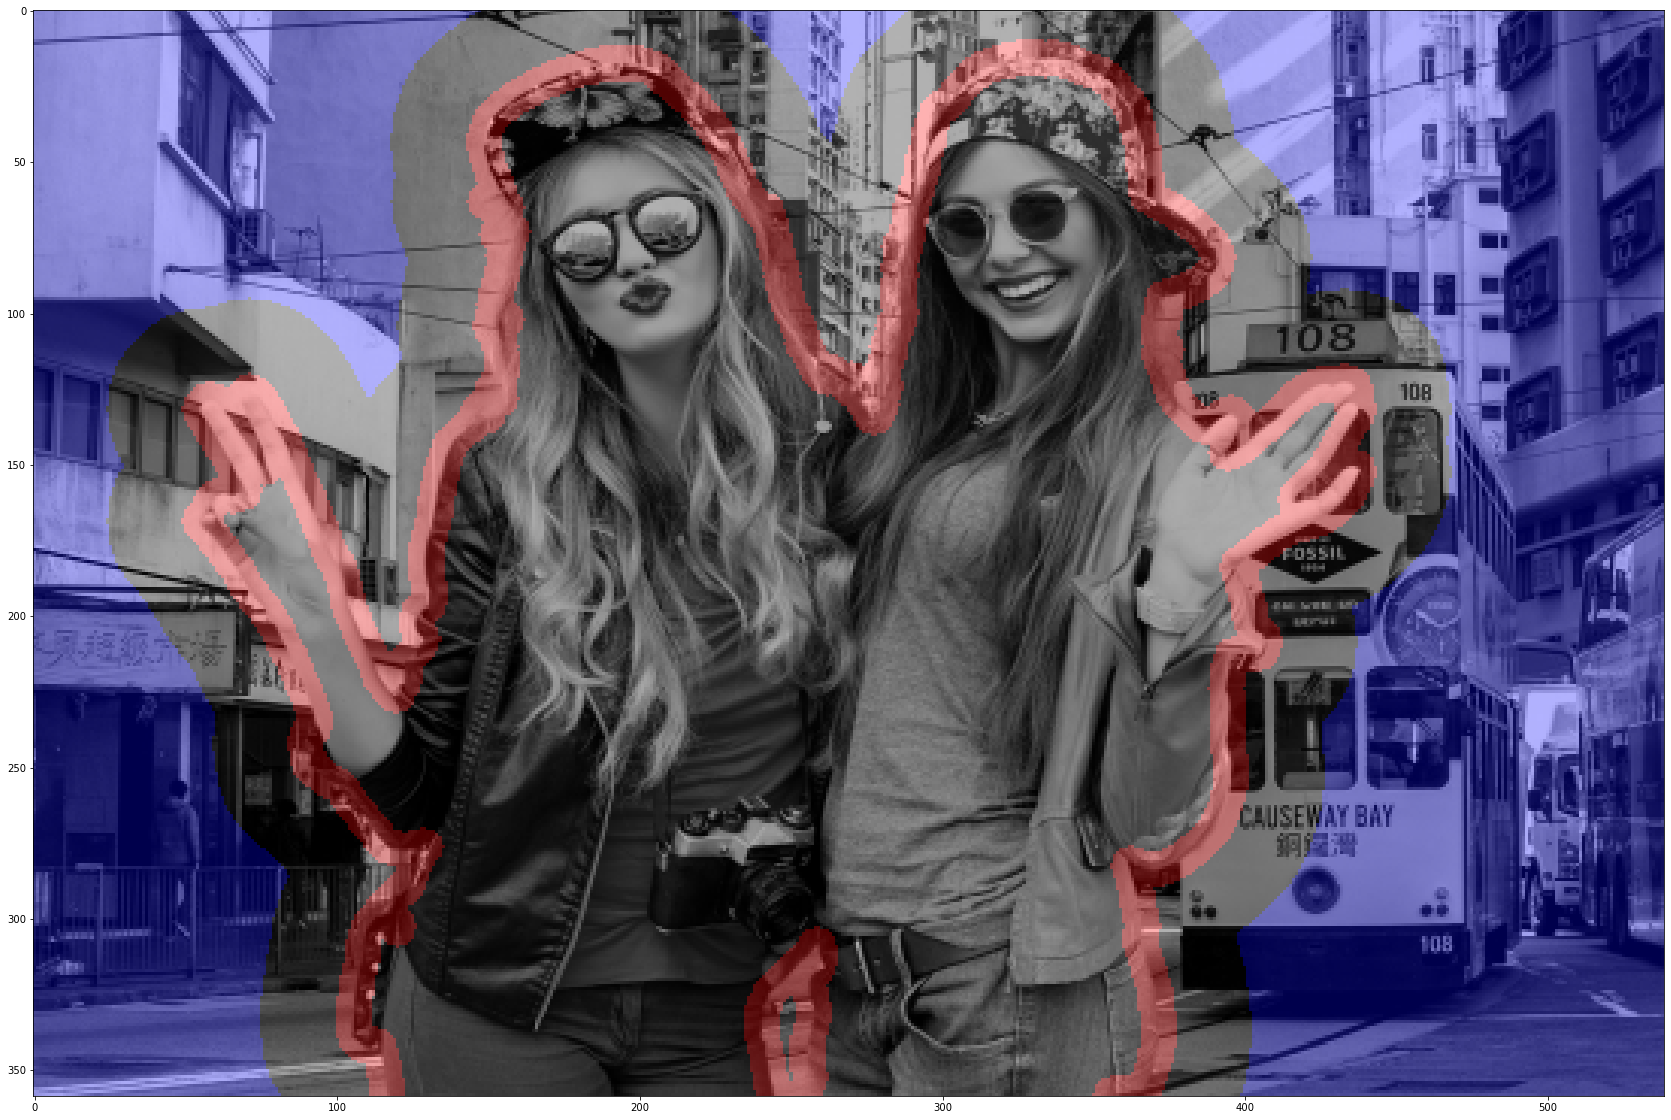

In [19]:
overlay, legend = regions_inspect.overlay_regions(image=image, regions=[region,region2], regions_names=[new_regionize, new_regionize2])
show_all(1, 1, overlay)

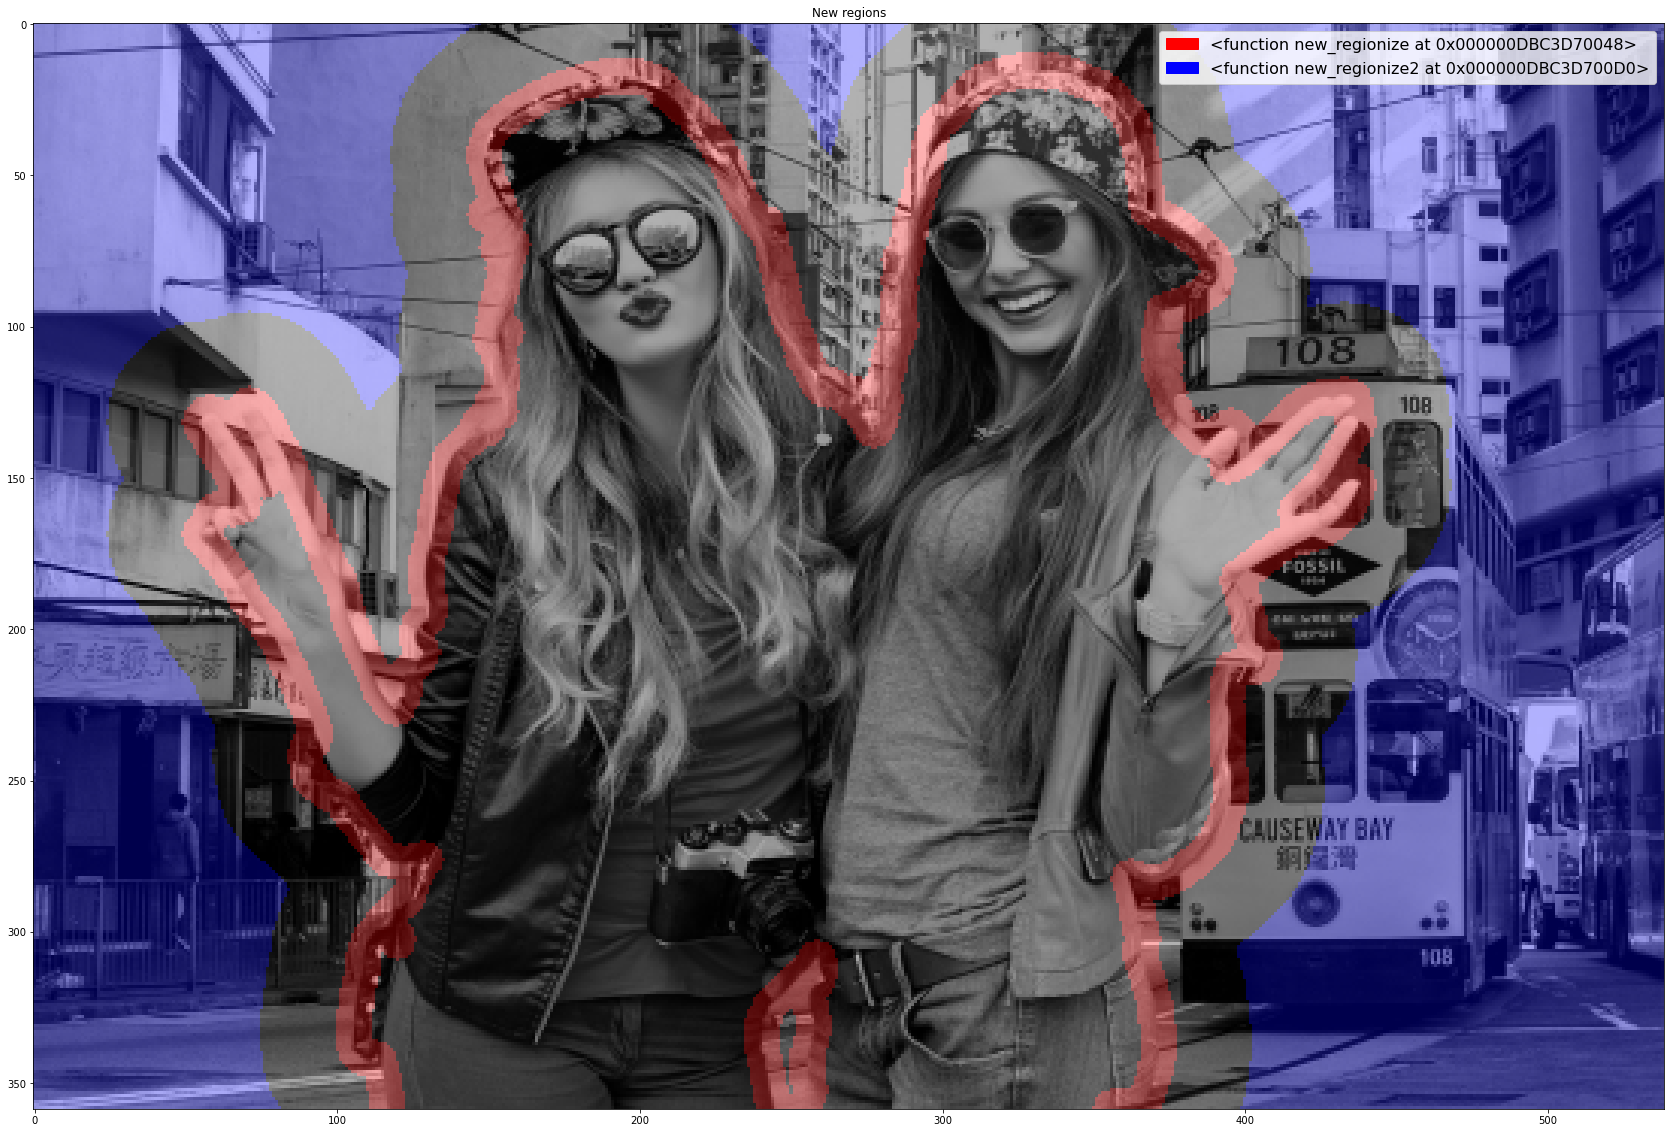

In [20]:

importlib.reload(sep._commons.visuals)
sep._commons.visuals.show_with_legend(overlay, legend, title="New regions")

## Investigate the chosen regioner
In this section you can see the regions created by the chosen regionizer on the entire dataset. This allows to visually assess the sensibility of using that regioner.

In [ ]:
importlib.reload(regions)
#regioner = regions.EntireRegion()
#regioner_fun = regioner.regionize
regioners_fun = [new_regionize, new_regionize2]

In [ ]:
full_image = np.ones_like(annotation)
region = regioners_fun[0](annotation, mask=full_image)
info(annotation, "annotation")
info(full_image, "full_image")

In [ ]:
show_all(1, 2, annotation, region)